In [1]:
from keras import layers
layer = layers.Dense(32, input_shape=(784,))

Using TensorFlow backend.


In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
input_tensor=layers.Input(shape=(784,))
x=layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model= models.Model(inputs=input_tensor, outputs=output_tensor)

In [10]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
                loss='mse',
                metrics=['accuracy'])

In [11]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

NameError: name 'target_tensor' is not defined

In [16]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)

In [17]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [18]:
train_labels[0]

1

In [21]:
max([max(sequence) for sequence in train_data])

9999

In [24]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()])
decode_review = ''.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [28]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [30]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [31]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [32]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
             metrics=['accuracy'])

In [34]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [35]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [36]:
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy', 
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512, 
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s - loss: 0.5135 - acc: 0.7920 - val_loss: 0.4026 - val_acc: 0.8629
Epoch 2/20
15000/15000 [==============================] - 4s - loss: 0.3131 - acc: 0.9033 - val_loss: 0.3165 - val_acc: 0.8830
Epoch 3/20
15000/15000 [==============================] - 4s - loss: 0.2295 - acc: 0.9256 - val_loss: 0.2799 - val_acc: 0.8916
Epoch 4/20
15000/15000 [==============================] - 4s - loss: 0.1795 - acc: 0.9428 - val_loss: 0.2734 - val_acc: 0.8907
Epoch 5/20
15000/15000 [==============================] - 4s - loss: 0.1482 - acc: 0.9526 - val_loss: 0.2788 - val_acc: 0.8886
Epoch 6/20
15000/15000 [==============================] - 4s - loss: 0.1196 - acc: 0.9629 - val_loss: 0.3249 - val_acc: 0.8804
Epoch 7/20
15000/15000 [==============================] - 4s - loss: 0.1022 - acc: 0.9694 - val_loss: 0.3061 - val_acc: 0.8847
Epoch 8/20
15000/15000 [==============================] - 3s 

In [39]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

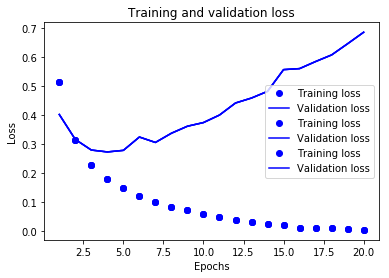

In [43]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

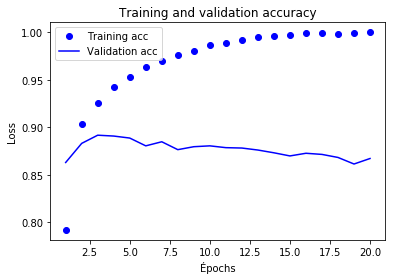

In [47]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [48]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
             loss = 'binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
25000/25000 [==============================] - 8s - loss: 0.4719 - acc: 0.8105     
Epoch 2/4
25000/25000 [==============================] - 4s - loss: 0.2652 - acc: 0.9078     
Epoch 3/4
25000/25000 [==============================] - 4s - loss: 0.2022 - acc: 0.9278     
Epoch 4/4
24992/25000 [============================>.] - ETA: 0s

In [49]:
results

[0.291119168548584, 0.88500000000000001]

In [51]:
model.predict(x_test)

array([[ 0.92233008],
       [ 0.83139694],
       [ 0.99948031],
       ..., 
       [ 0.4423424 ],
       [ 0.00364403],
       [ 0.81645226]], dtype=float32)